## Support Vector Machine(SVM)-Linear

### Importing Libraries & Dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
dataset = pd.read_csv('UniversalBank.csv')

In [46]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


As ID & ZIP Code are of now use so we will drop them

In [56]:
dataset.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [58]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### Splitting Data into Training and Test Sets

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

### Applying Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
print(X_train)

[[ 0.66439722  0.77073898 -1.12115382 ... -0.33840298 -0.25264558
   0.82802778]
 [-0.81450588 -1.22835846 -1.05597078 ... -0.33840298 -0.25264558
   0.82802778]
 [ 1.44734592  1.5529945  -0.75178323 ...  2.9550567  -0.25264558
   0.82802778]
 ...
 [ 0.05543712  0.16231802 -0.99078773 ... -0.33840298 -0.25264558
   0.82802778]
 [ 0.05543712  0.16231802  0.33460087 ... -0.33840298 -0.25264558
   0.82802778]
 [-0.64051728 -1.0545239  -0.05649741 ... -0.33840298 -0.25264558
   0.82802778]]


In [62]:
print(X_test)

[[-1.24947738 -1.31527574  0.22596246 ... -0.33840298 -0.25264558
  -1.20768895]
 [-0.90150018 -0.96760662 -0.62141714 ...  2.9550567  -0.25264558
  -1.20768895]
 [-0.98849448 -0.96760662 -0.83869396 ... -0.33840298 -0.25264558
  -1.20768895]
 ...
 [ 0.57740292  0.6838217   2.29009225 ... -0.33840298 -0.25264558
  -1.20768895]
 [-1.42346598 -1.40219302 -0.64314482 ... -0.33840298 -0.25264558
   0.82802778]
 [-0.37953438 -0.27226838 -0.62141714 ...  2.9550567  -0.25264558
   0.82802778]]


### Training SVM and then applying it

In [63]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [64]:
print(classifier.predict(sc.transform([[25,1,49,4,1.6,1,0,0,1,0,0]])))

[0]


In [65]:
y_pred = classifier.predict(X_test)

In [66]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Results

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.751

Accuary is low because it is linear SVM.

<Axes: >

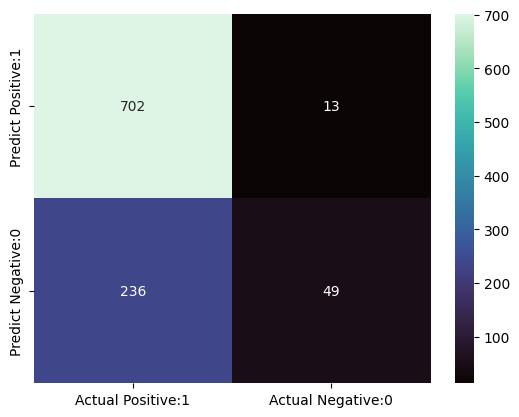

In [69]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')